In [2]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2HDM with $Z_2$ symmetry

In [3]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [4]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [5]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[1.619994334706699,
  3.218346102807244,
  4.8837262771795915,
  -0.045385839665648575],
 [4.833312208572483,
  1.3421856347159942,
  4.869529168370347,
  1.3059686749181303],
 [0.6835635445582655,
  0.9449472635033871,
  0.2909154464782576,
  0.6835635445582655],
 [2.38333557830797, 4.570784230422815, 3.1229122613677425, 2.38333557830797],
 [0.5106545392653956,
  4.884315217278711,
  4.542704720316788,
  0.5106545392653956],
 [-0.23810025559881076,
  3.513112417073243,
  3.8102304857655107,
  -0.5352183242910784],
 [3.691777551749288,
  -2.1349033490743707,
  0.26744666940592576,
  1.2894275332689915],
 [2.543989358208468, 2.165802834321112, 0.5856874736391043, 2.543989358208468],
 [0.973506948848545,
  0.608997039457444,
  0.8700970155674143,
  0.7124069727385748],
 [3.0336481805429596,
  1.7390163863487764,
  1.901371008698311,
  2.871293558193425],
 [1.3752399357305336,
  -0.7168490331323172,
  0.48847107346811247,
  0.16991982913010384],
 [3.1123285357288903,
  4.632434290287636,

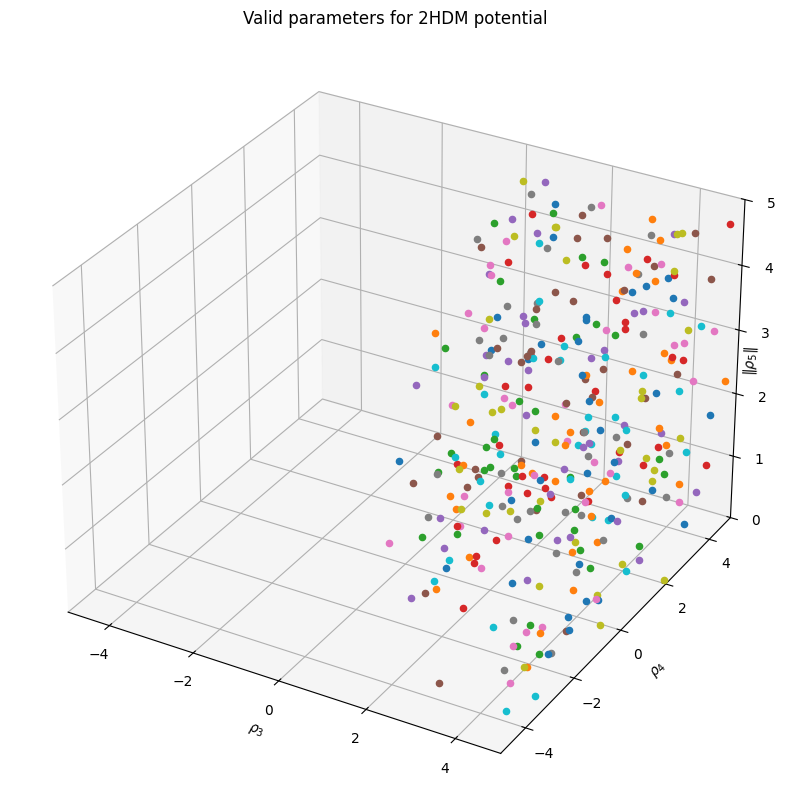

In [6]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

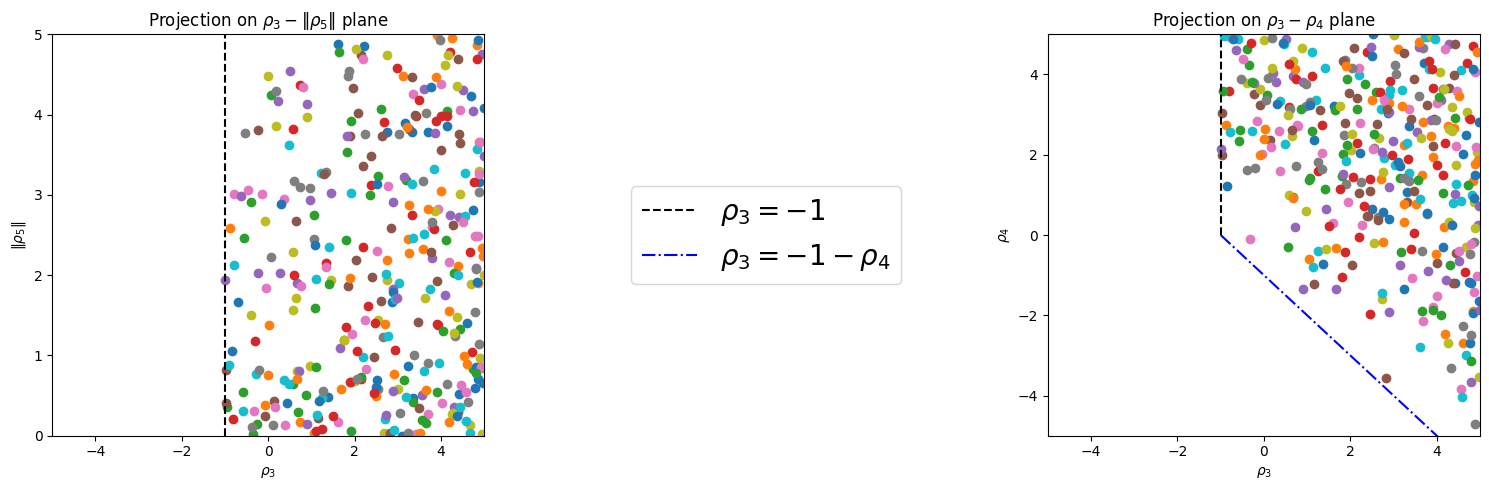

In [7]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [8]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [9]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [10]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [11]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [12]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,2*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [13]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[0.11280537248941336,
  3.6488109523724592,
  2.305498137333712,
  0.45180566681337647,
  2.46548009438078,
  4.7506773573467695,
  2.2306996011417874,
  2.302368551618948,
  0.19199950576781077],
 [4.198440432220519,
  2.5070095504265675,
  0.26254838472108355,
  4.087906249540716,
  0.46758552352751004,
  0.30421544040199244,
  3.1380335910220607,
  0.058730896631575644,
  0.4204143046105715],
 [3.1998250236573647,
  0.749270863137049,
  0.3978435713716755,
  1.800409944420268,
  2.627799546843864,
  0.32342482829712377,
  0.4602668393238929,
  4.387473304450593,
  0.2969957067245974],
 [1.3664089984588799,
  2.6079952271830926,
  1.102805091847049,
  6.135270476819615,
  0.6534054745086598,
  2.648935378160783,
  1.4671608247196877,
  4.410407355367652,
  1.88012702752307],
 [4.928149171165646,
  1.3907453470271953,
  3.9487839115072987,
  4.495160931060101,
  0.8601812695926164,
  0.7160733740246402,
  0.1986742743735298,
  0.8446349200386374,
  1.5291963326743514],
 [1.0103216057

In [14]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [15]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [16]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [17]:
# Check!

# Reproduce Z_2-conserving 2HDM results

dim = 100
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
#
new_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),np.linspace(0,0,dim),dim,10**(-5))
new_valid_values

[[3.013847767803142,
  0.40225614014208944,
  1.8284535696148296,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [2.386682535865674,
  0.3203665558503834,
  0.2591765287390685,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [-0.17994402673057763,
  3.6998271156901925,
  0.3798386103322693,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.8212681340451813],
 [2.01752170589005,
  2.550698164280183,
  4.278490695967117,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.299240425364884],
 [2.2551769889803497,
  4.068115172385875,
  1.6145104927787828,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0],
 [0.8978936714328531,
  2.8728858147329763,
  1.5784388690816438,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.8979985656343084],
 [0.1037595575747563,
  4.3565812689279735,
  3.7526249085556067,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.1046802686299806],
 [2.8290229653957226,
  0.7018155407916593,
  2.716920155111842,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.8196859826571976],
 [2.790042584950773,
  3.53817210774074,
  0.43736391025295

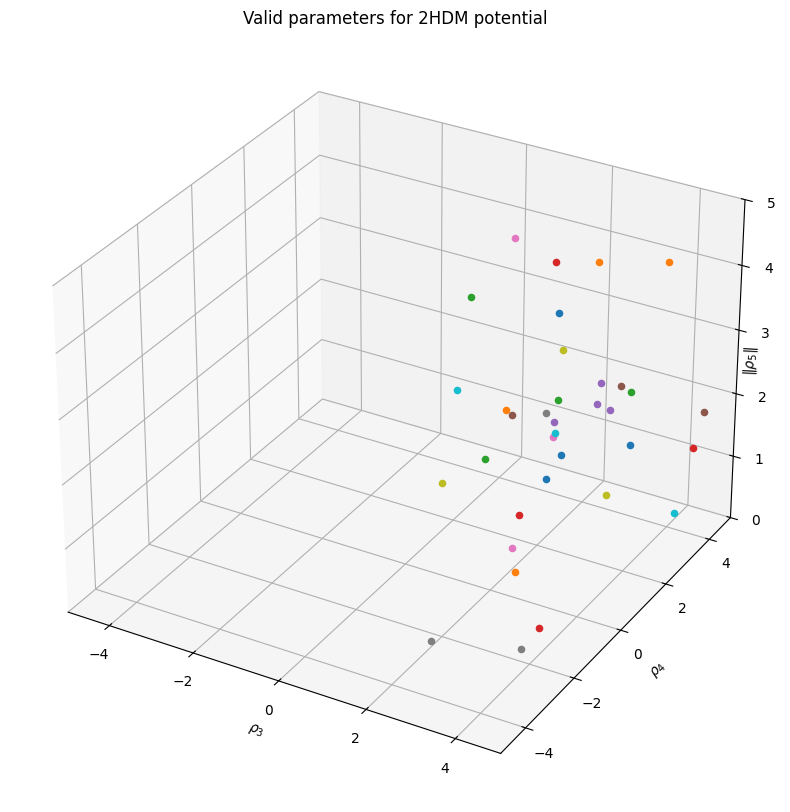

In [18]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

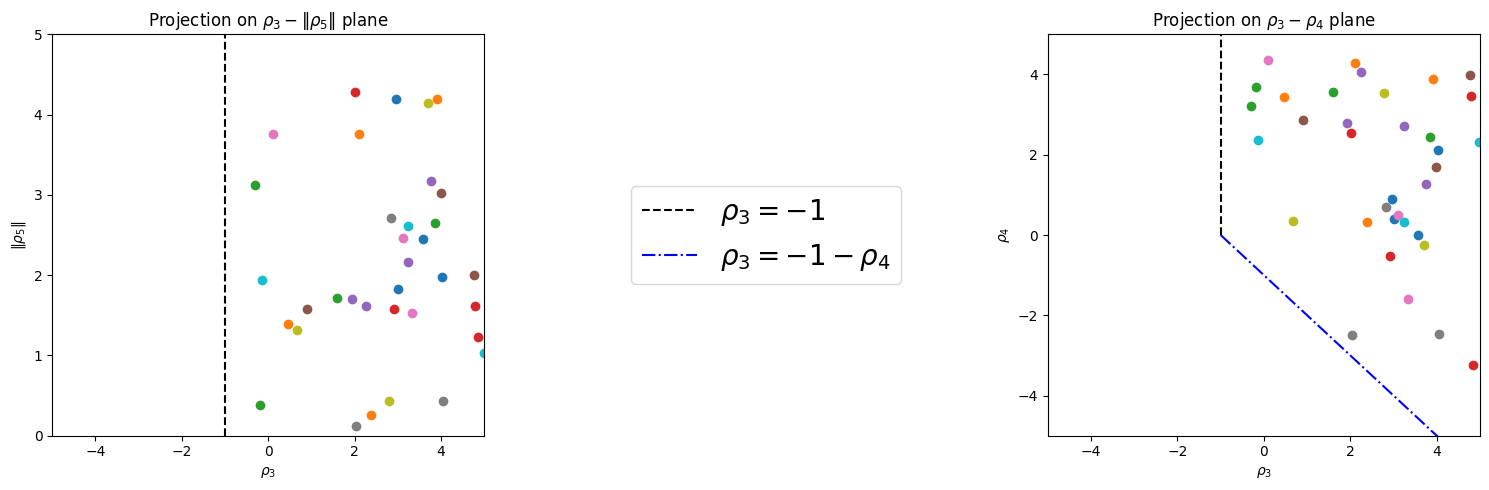

In [19]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(new_valid_values)-1, len(new_valid_values)):
    ax.scatter(new_valid_values[int(point)][0], new_valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [20]:
# Explore Z_2-violating 2HDM results

dim = 100
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_valid_values

[[0.8726081570594957,
  1.399576722328117,
  0.12475421843659629,
  4.344279140846914,
  1.0507198438852066,
  3.7923292826133745,
  1.3027649910452166,
  4.419745356877887,
  1.493386625257743],
 [0.8464486676002689,
  4.3862053803434815,
  1.2323380714734307,
  0.28049574451903053,
  0.6976397737548229,
  1.519785526367467,
  3.2420294149980555,
  3.99681636953764,
  1.2254762673318758],
 [4.901113183340005,
  -2.1590135978271885,
  0.9796296436940577,
  3.183418090250659,
  0.8615651143629383,
  2.9145927588753042,
  1.3260121579531803,
  5.231942761567814,
  1.4431774470324887],
 [2.165783672907528,
  3.730371766866554,
  0.32713806026566206,
  2.957459164490789,
  4.157023556072001,
  5.163739920291262,
  0.4259048898628953,
  3.8608764809149108,
  1.341846995733635],
 [2.43738727583617,
  4.7983269642581625,
  0.8173987686787582,
  3.537385685191646,
  4.4016632965058875,
  5.458718173026638,
  0.048967417326222784,
  0.4637460418794106,
  0.565125271299002],
 [-0.845898133094574

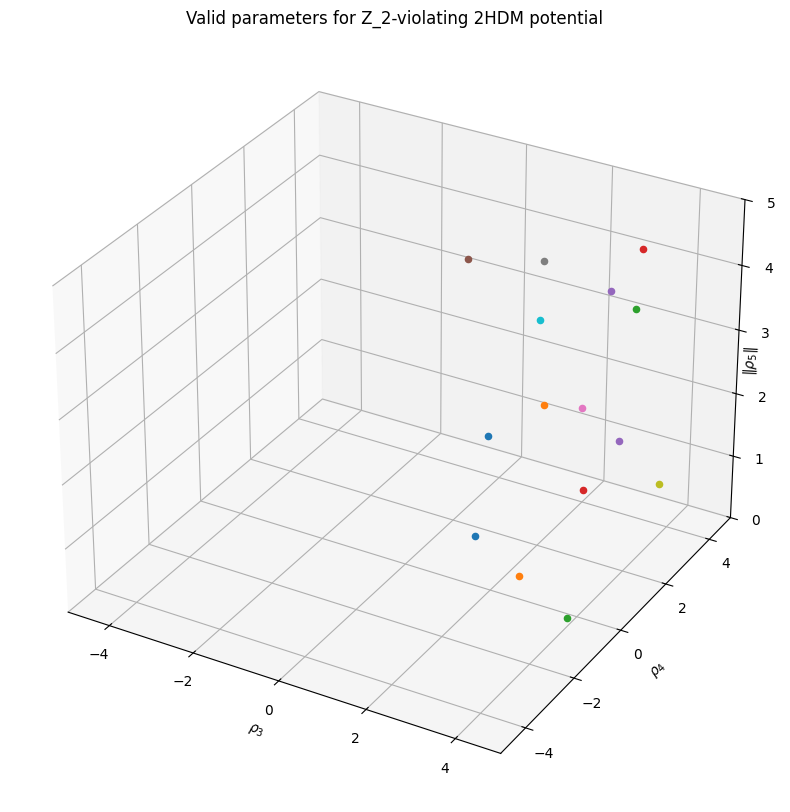

In [21]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    #
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for Z_2-violating 2HDM potential')

plt.show()

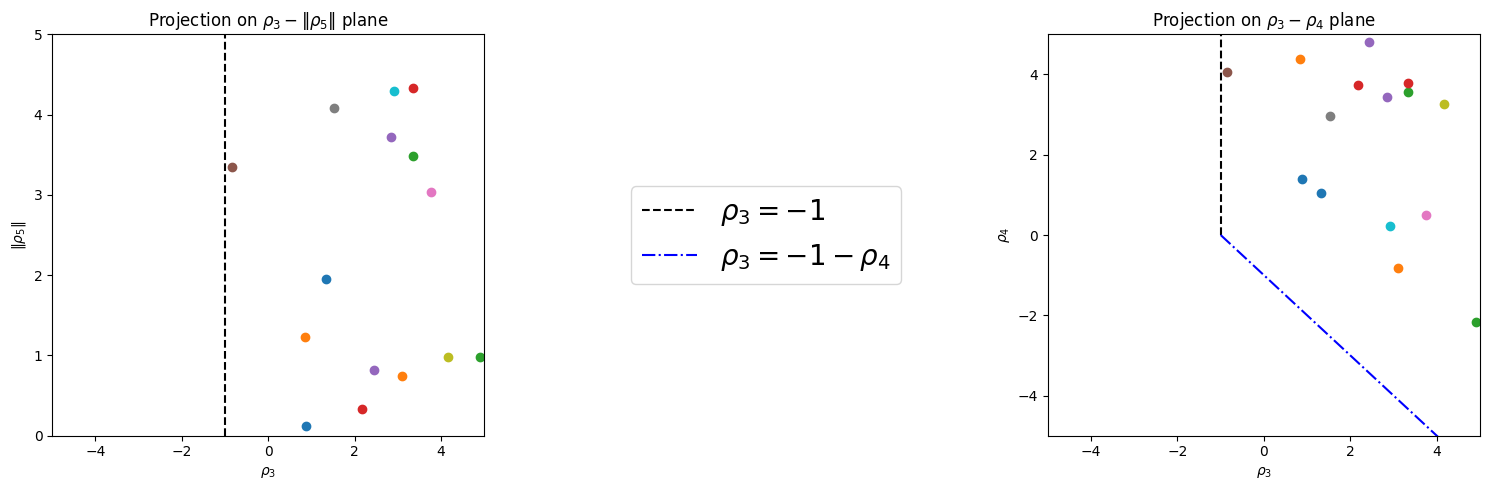

In [22]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

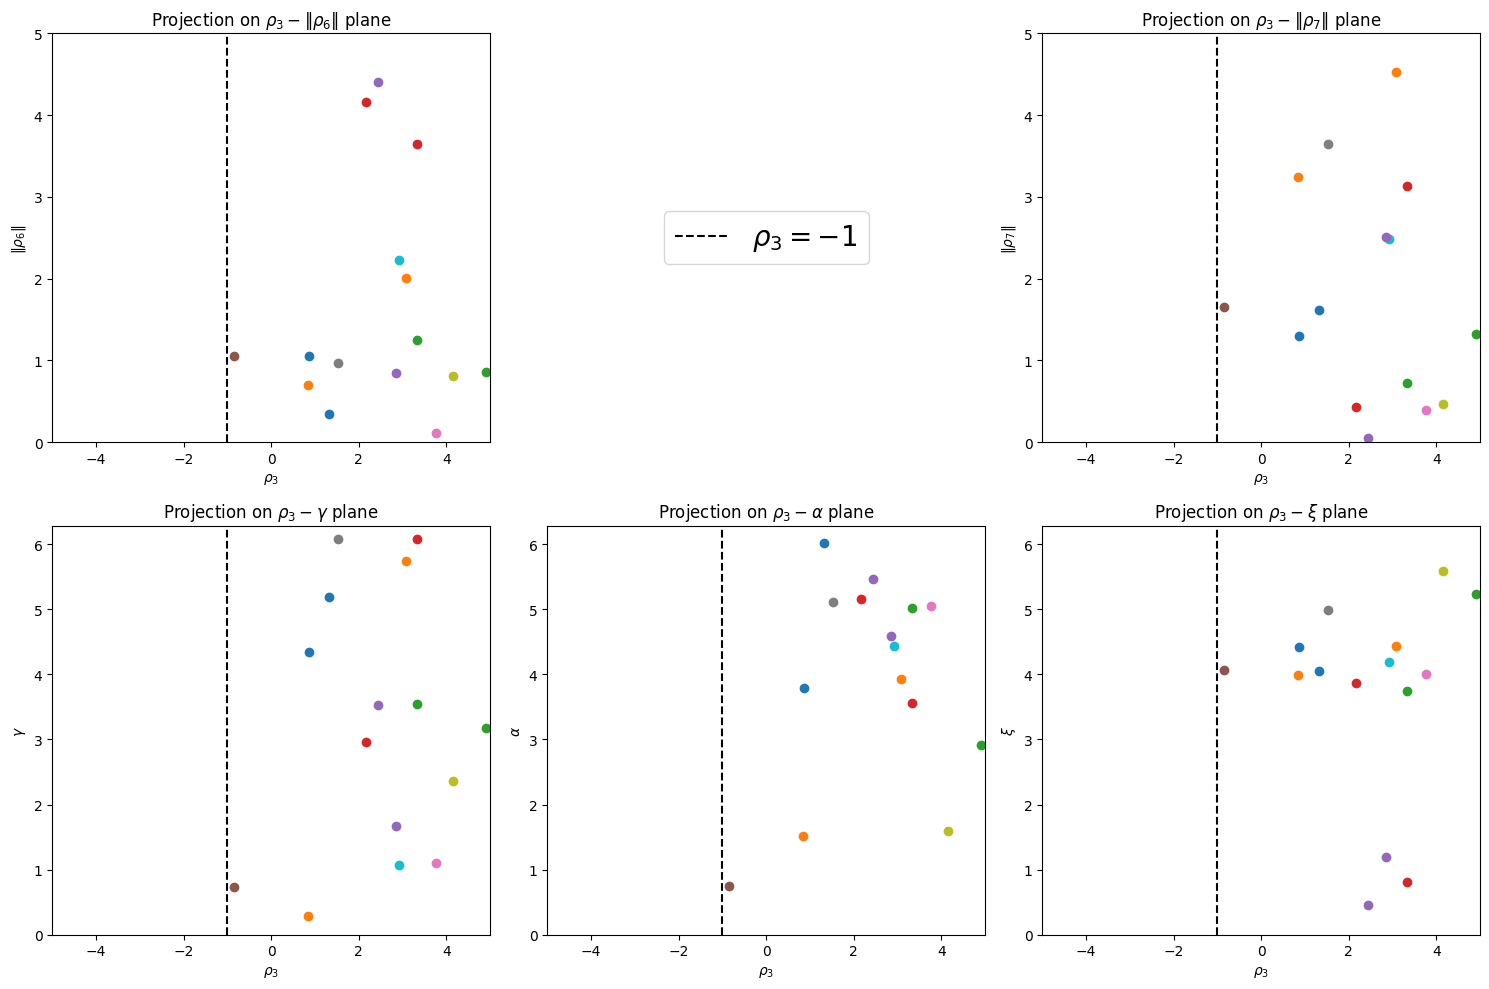

In [23]:
# Projection on different planes

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,3,1)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][4])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{6}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{6}\|$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,3)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][6])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{7}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{7}\|$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,2)
plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')

ax = fig.add_subplot(2,3,4)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][3])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\gamma$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_title(r'Projection on $\rho_{3}-\gamma$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,5)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][5])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\alpha$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_title(r'Projection on $\rho_{3}-\alpha$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(2,3,6)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\xi$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_title(r'Projection on $\rho_{3}-\xi$ plane')
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

plt.tight_layout()
plt.show()

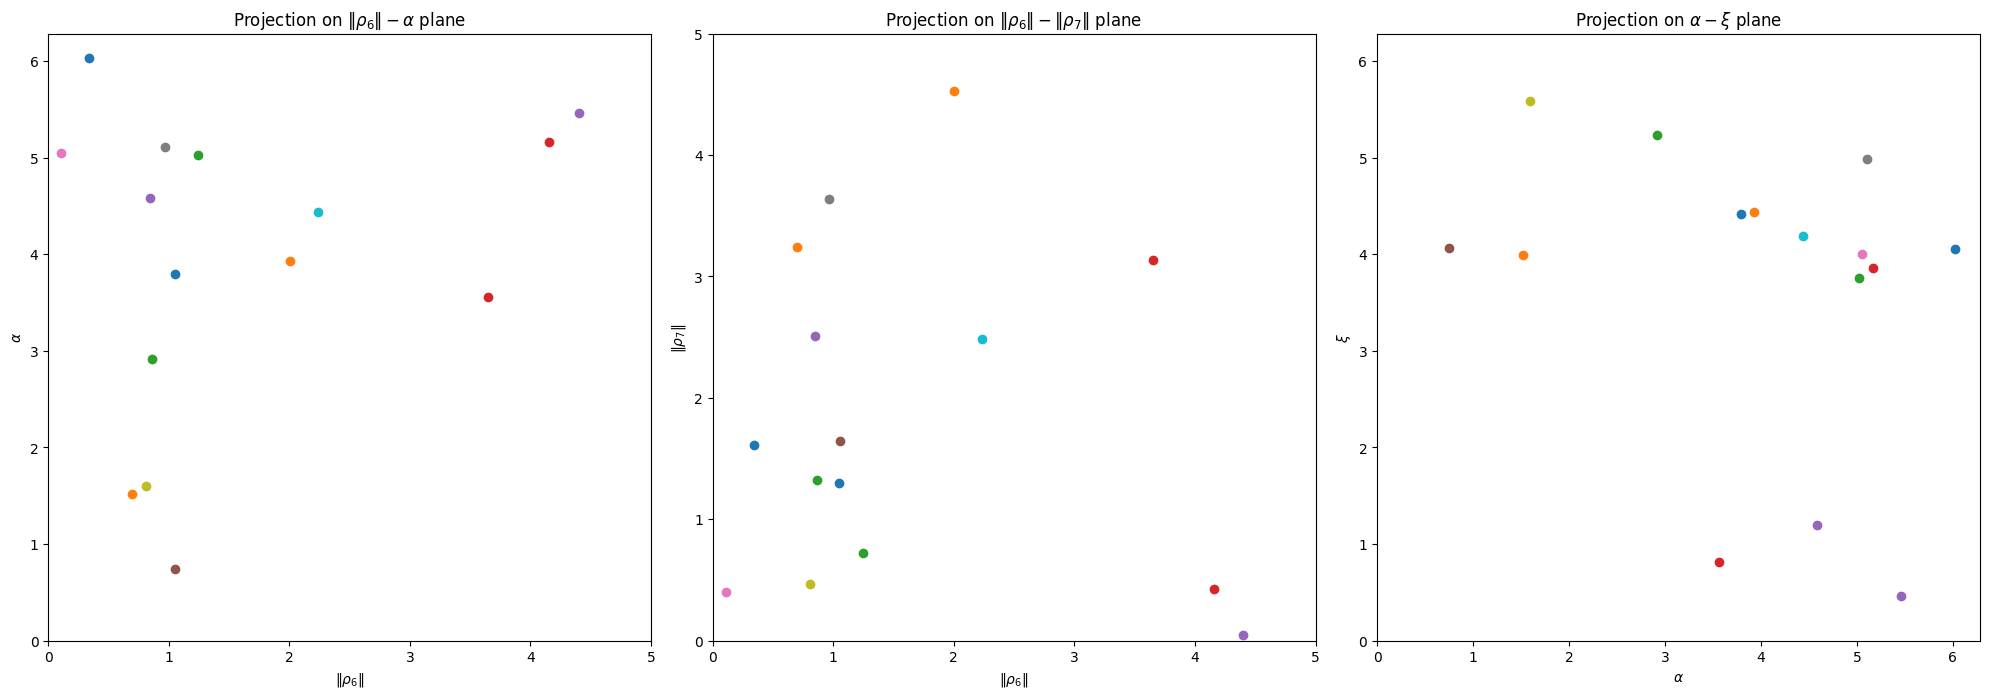

In [ ]:
#More projections

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3,3,1)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][5])

ax.set_xlabel(r'$\|\rho_{6}\|$')
ax.set_ylabel(r'$\alpha$')
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_title(r'Projection on $\|\rho_{6}\|-\alpha$ plane')

ax = fig.add_subplot(3,3,2)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][6])

ax.set_xlabel(r'$\|\rho_{6}\|$')
ax.set_ylabel(r'$\|\rho_{7}\|$')
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\|\rho_{6}\|-\|\rho_{7}\|$ plane')

ax = fig.add_subplot(3,3,3)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\xi$')
ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])
ax.set_title(r'Projection on $\alpha-\xi$ plane')

plt.tight_layout()  
plt.show()

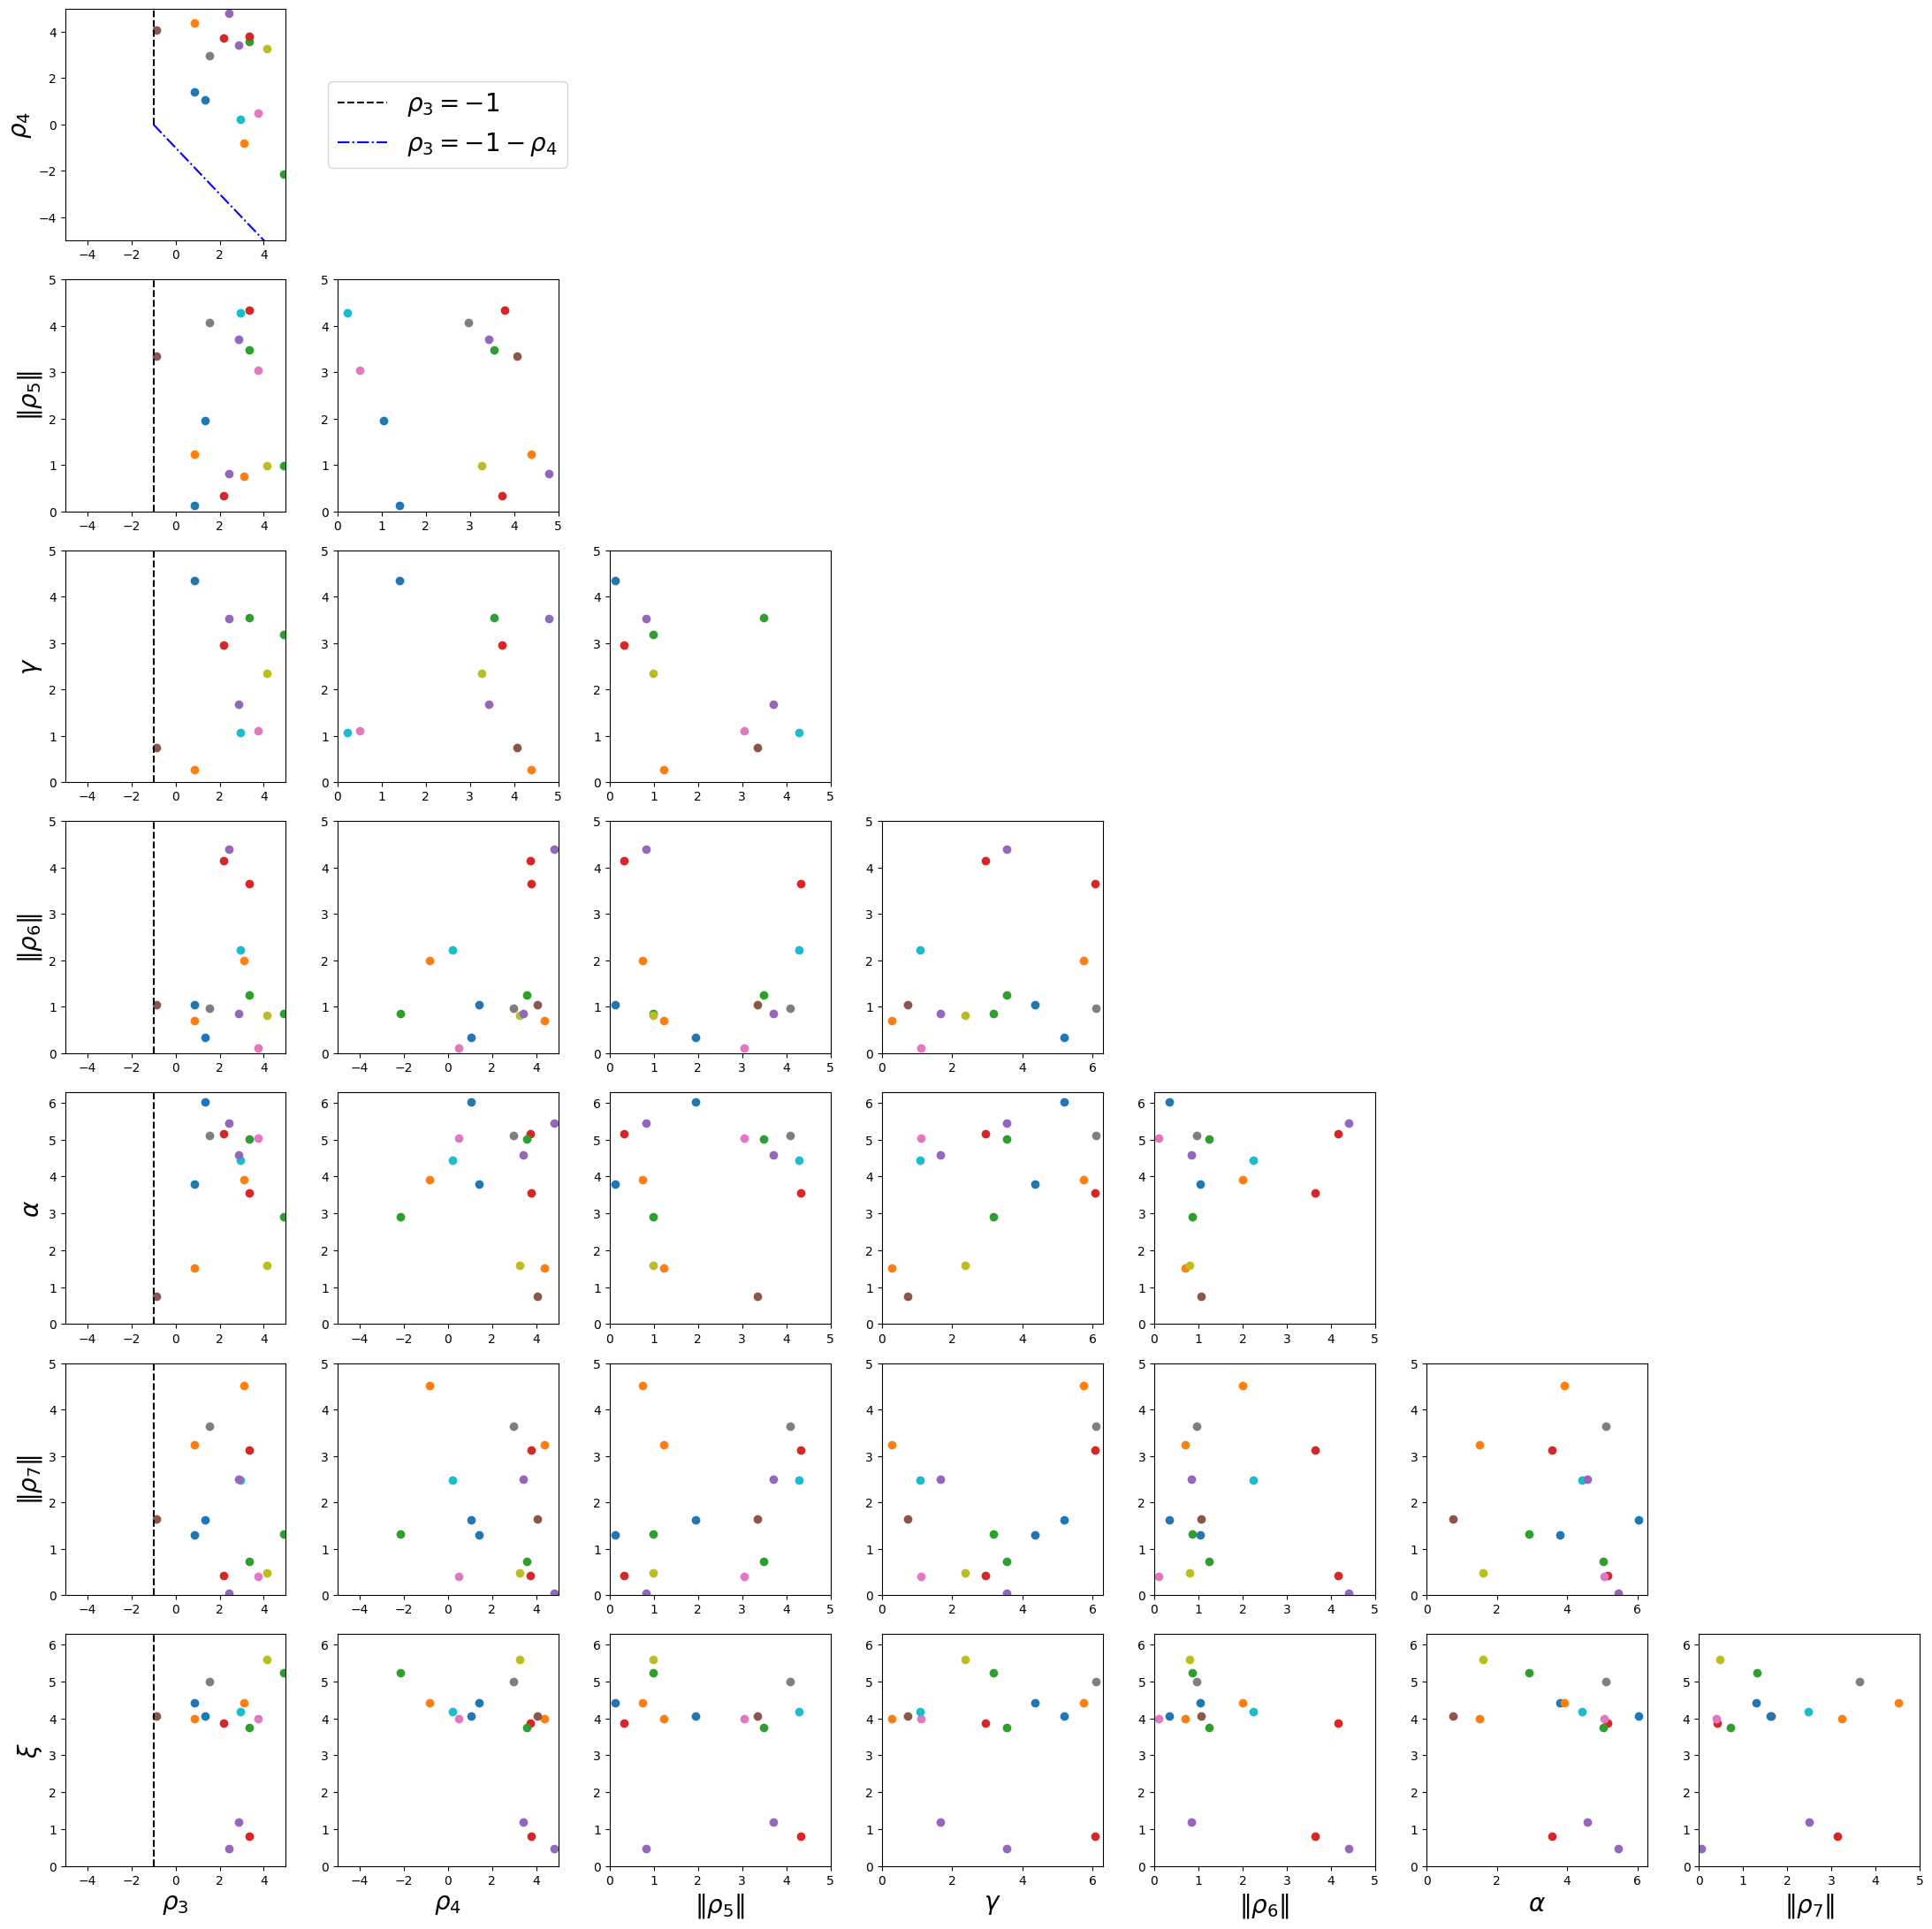

In [82]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][2])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][1], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][2], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][3], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][4], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][5], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(Z2_violating_valid_values)-1, len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][6], Z2_violating_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

In [25]:
# Explore Z_2-violating 2HDM results with rho_3<-1 (these values are impossible in the 2HDM with Z_2 symmetry)

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,5,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [26]:
# Extend the limits in order to explore Z_2-violating 2HDM results with rho_3<-1

dim = 100
rho_3 = np.random.default_rng().uniform(-5,-1,dim)
rho_4 = np.random.default_rng().uniform(-10,10,dim)
rho_5 = np.random.default_rng().uniform(0,10,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,10,dim) 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_7 = np.random.default_rng().uniform(0,10,dim) 
xi = np.random.default_rng().uniform(0,2*np.pi,dim)
#
Z2_violating_negative_rho3_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
Z2_violating_negative_rho3_valid_values

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.
